# Projeto Redes

Alexandre Young

Bruno Cesconetto

Lucas Chen Alba

In [73]:
import freeman as fm
import networkx as nx
import scipy, pylab
import pandas as pd

pd.options.display.min_rows = 90


In [83]:
# Rede two-mode (repos -> linguagens)

repo_g = fm.load('data/repos_langs.gml')
# Visualization
repo_g.set_all_nodes('size', (9))
repo_g.set_all_nodes('labpos', 'hover')

for n in repo_g.nodes:
    if (n.find('/') == -1):
        repo_g.nodes[n]['color'] = (0, 255, 0)
        repo_g.nodes[n]['size'] = (20)
    repo_g.nodes[n]['label'] = n
repo_g.move('bipartite', [n for n in repo_g.nodes if repo_g.nodes[n]['size'] != 20])
repo_g.draw()

In [84]:
# Rede one-mode (linguagens a partir dos repos)
onemode_repos_g = fm.load('data/repos_langs_onemode.gml')

# Visualization
onemode_repos_g.set_all_nodes('size', (15))
onemode_repos_g.set_all_nodes('labpos', 'hover')

for n in onemode_repos_g.nodes:
    onemode_repos_g.nodes[n]['label'] = n

onemode_repos_g.move('kamada_kawai')
onemode_repos_g.draw()

In [93]:
# onemode_repos_g.set_nodedata('repo_name', 'label')

onemode_repos_g.set_nodecol('betweenness', nx.betweenness_centrality(onemode_repos_g))
onemode_repos_g.set_nodecol('closeness', nx.closeness_centrality(onemode_repos_g))
onemode_repos_g.set_nodecol('degree', onemode_repos_g.degree)
onemode_repos_g.set_nodecol('eigen_vector', nx.eigenvector_centrality(onemode_repos_g))

repo_df = onemode_repos_g.nodeframe


In [94]:
repo_df.sort_values('betweenness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
7,Java,0.011268,0.246772,10,9.938323e-02
6,HTML,0.010785,0.394836,28,2.359034e-01
2,JavaScript,0.008270,0.382099,27,2.333722e-01
4,Shell,0.008270,0.382099,27,2.333722e-01
1,Python,0.008270,0.382099,27,2.333722e-01
15,Makefile,0.007179,0.370158,26,2.297038e-01
9,Dockerfile,0.006072,0.348384,24,2.169918e-01
8,CSS,0.003852,0.338431,23,2.149757e-01
24,C,0.003482,0.338431,23,2.184012e-01
12,Batchfile,0.002905,0.329030,23,2.178926e-01


In [95]:
repo_df.sort_values('closeness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
6,HTML,0.010785,0.394836,28,2.359034e-01
1,Python,0.008270,0.382099,27,2.333722e-01
2,JavaScript,0.008270,0.382099,27,2.333722e-01
4,Shell,0.008270,0.382099,27,2.333722e-01
15,Makefile,0.007179,0.370158,26,2.297038e-01
9,Dockerfile,0.006072,0.348384,24,2.169918e-01
24,C,0.003482,0.338431,23,2.184012e-01
3,C++,0.002895,0.338431,23,2.194611e-01
8,CSS,0.003852,0.338431,23,2.149757e-01
12,Batchfile,0.002905,0.329030,23,2.178926e-01


In [96]:
repo_df.sort_values('degree', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
6,HTML,0.010785,0.394836,28,2.359034e-01
1,Python,0.008270,0.382099,27,2.333722e-01
2,JavaScript,0.008270,0.382099,27,2.333722e-01
4,Shell,0.008270,0.382099,27,2.333722e-01
15,Makefile,0.007179,0.370158,26,2.297038e-01
9,Dockerfile,0.006072,0.348384,24,2.169918e-01
12,Batchfile,0.002905,0.329030,23,2.178926e-01
24,C,0.003482,0.338431,23,2.184012e-01
3,C++,0.002895,0.338431,23,2.194611e-01
8,CSS,0.003852,0.338431,23,2.149757e-01


In [97]:
# Rede two-mode (devs -> linguagens)
dev_g = fm.load('data/devs_langs.gml')
# Visualization
dev_g.set_all_nodes('size', (9))
dev_g.set_all_nodes('labpos', 'hover')

for n in dev_g.nodes:
    if (n.find('/') != -1):
        dev_g.nodes[n]['color'] = (0, 255, 0)
        dev_g.nodes[n]['size'] = (20)
    dev_g.nodes[n]['label'] = n
dev_g.move('bipartite', [n for n in dev_g.nodes if dev_g.nodes[n]['size'] != 20])
dev_g.draw()

In [98]:
# Rede one-mode (linguagens a partir dos devs)

onemode_devs_g = fm.load('data/devs_langs_onemode.gml')

# Visualization
onemode_devs_g.set_all_nodes('size', (15))
onemode_devs_g.set_all_nodes('labpos', 'hover')

for n in onemode_devs_g.nodes:
    onemode_devs_g.nodes[n]['label'] = n

# onemode_devs_g.move('bipartite', [n for n in onemode_devs_g.nodes if onemode_devs_g.nodes[n]['size'] != 20])
onemode_devs_g.move('kamada_kawai')

onemode_devs_g.draw()

In [99]:
onemode_devs_g.set_nodecol('betweenness', nx.betweenness_centrality(onemode_devs_g))
onemode_devs_g.set_nodecol('closeness', nx.closeness_centrality(onemode_devs_g))
onemode_devs_g.set_nodecol('degree', onemode_devs_g.degree)
onemode_devs_g.set_nodecol('eigen_vector', nx.eigenvector_centrality(onemode_devs_g))

dev_df = onemode_devs_g.nodeframe



In [100]:
dev_df.sort_values('betweenness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
0,Python,0.033469,1.000000,79,0.171244
14,HTML,0.033469,1.000000,79,0.171244
5,Shell,0.033469,1.000000,79,0.171244
13,CSS,0.033469,1.000000,79,0.171244
2,Makefile,0.031206,0.987500,78,0.170460
20,JavaScript,0.028360,0.963415,76,0.168036
17,C,0.025037,0.951807,75,0.167915
3,Batchfile,0.024039,0.940476,74,0.166632
10,C++,0.023723,0.940476,74,0.166734
26,Objective-C,0.020493,0.918605,72,0.164699


In [101]:
dev_df.sort_values('closeness', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
0,Python,0.033469,1.000000,79,0.171244
5,Shell,0.033469,1.000000,79,0.171244
14,HTML,0.033469,1.000000,79,0.171244
13,CSS,0.033469,1.000000,79,0.171244
2,Makefile,0.031206,0.987500,78,0.170460
20,JavaScript,0.028360,0.963415,76,0.168036
17,C,0.025037,0.951807,75,0.167915
10,C++,0.023723,0.940476,74,0.166734
3,Batchfile,0.024039,0.940476,74,0.166632
26,Objective-C,0.020493,0.918605,72,0.164699


In [102]:
dev_df.sort_values('degree', ascending=0)

,id,betweenness,closeness,degree,eigen_vector
0,Python,0.033469,1.000000,79,0.171244
5,Shell,0.033469,1.000000,79,0.171244
14,HTML,0.033469,1.000000,79,0.171244
13,CSS,0.033469,1.000000,79,0.171244
2,Makefile,0.031206,0.987500,78,0.170460
20,JavaScript,0.028360,0.963415,76,0.168036
17,C,0.025037,0.951807,75,0.167915
10,C++,0.023723,0.940476,74,0.166734
3,Batchfile,0.024039,0.940476,74,0.166632
26,Objective-C,0.020493,0.918605,72,0.164699


In [103]:
repo_df = repo_df.sort_values('id', ascending=1)
repo_df

,id,betweenness,closeness,degree,eigen_vector
67,ASP,0.000000,0.000000,0,4.259209e-12
55,AppleScript,0.000000,0.000000,0,4.259209e-12
38,Assembly,0.000000,0.219353,5,5.449875e-02
42,Awk,0.000000,0.000000,0,4.259209e-12
12,Batchfile,0.002905,0.329030,23,2.178926e-01
24,C,0.003482,0.338431,23,2.184012e-01
29,C#,0.000000,0.296127,19,1.995380e-01
3,C++,0.002895,0.338431,23,2.194611e-01
39,CMake,0.000000,0.000000,0,4.259209e-12
8,CSS,0.003852,0.338431,23,2.149757e-01


In [104]:
dev_df = dev_df.sort_values('id', ascending=1)
dev_df

,id,betweenness,closeness,degree,eigen_vector
61,1C Enterprise,0.000000,0.603053,27,0.077282
25,ANTLR,0.000000,0.637097,34,0.096817
63,ASP,0.000000,0.603053,27,0.077282
74,ActionScript,0.000000,0.603053,27,0.075828
75,ApacheConf,0.000000,0.603053,27,0.075828
51,AppleScript,0.000012,0.560284,17,0.054436
34,Assembly,0.002238,0.692982,44,0.117779
72,AutoHotkey,0.000000,0.603053,27,0.075828
6,Awk,0.001521,0.626984,32,0.083640
3,Batchfile,0.024039,0.940476,74,0.166632


ValueError: x and y must be the same size

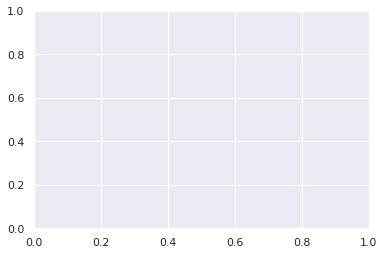

In [105]:
ax = pylab.subplot(111)
ax.scatter(dev_df['degree'], repo_df['degree'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



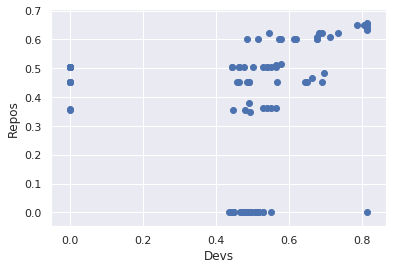

In [38]:
ax = pylab.subplot(111)
ax.scatter(dev_df['closeness'], repo_df['closeness'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



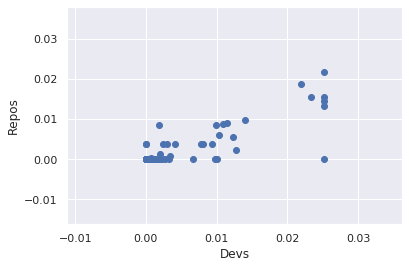

In [39]:
ax = pylab.subplot(111)
ax.scatter(dev_df['betweenness'], repo_df['betweenness'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
ax.figure.show()



/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



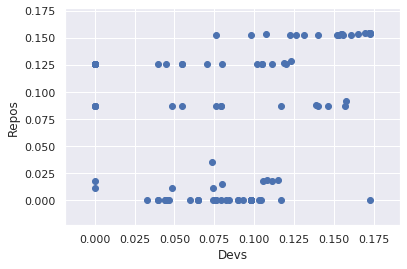

In [40]:
ax = pylab.subplot(111)
ax.scatter(dev_df['eigen_vector'], repo_df['eigen_vector'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



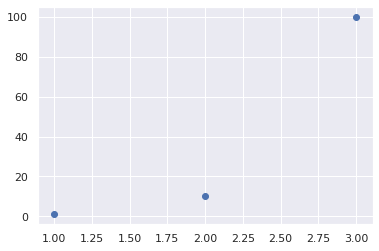

In [36]:
ax = pylab.subplot(111)
ax.scatter([1, 2, 3], [1, 10, 100])
ax.figure.show()

In [81]:
bet_df = pd.DataFrame()
bet_df['id'] = repo_df['id']
bet_df['betweenness_repo'] = repo_df['betweenness']
bet_df['betweenness_dev'] = dev_df['betweenness']


bet_df.sort_values('betweenness_repo', ascending=0)

,id,betweenness_repo,betweenness_dev
6,HTML,0.021785,0.025130
2,JavaScript,0.018873,0.021975
1,Python,0.015498,0.023410
4,Shell,0.015498,0.025130
8,CSS,0.014454,0.025130
11,Makefile,0.013312,0.025130
26,C,0.009711,0.013952
9,Dockerfile,0.009028,0.011416
7,Java,0.008671,0.010969
3,C++,0.008611,0.009983


In [79]:
clos_df = pd.DataFrame()
clos_df['id'] = repo_df['id']
clos_df['closeness_repo'] = repo_df['closeness']
clos_df['closeness_dev'] = dev_df['closeness']


clos_df.sort_values('closeness_repo', ascending=0)

,id,closeness_repo,closeness_dev
6,HTML,0.658071,0.813725
1,Python,0.649179,0.804038
2,JavaScript,0.649179,0.785340
4,Shell,0.649179,0.813725
11,Makefile,0.640523,0.813725
8,CSS,0.632095,0.813725
23,PHP,0.623886,0.544671
26,C,0.623886,0.734122
9,Dockerfile,0.623886,0.689176
3,C++,0.623886,0.682214


In [78]:
deg_df = pd.DataFrame()
deg_df['id'] = repo_df['id']
deg_df['degree_repo'] = repo_df['degree']
deg_df['degree_dev'] = dev_df['degree']

deg_df.sort_values('degree_repo', ascending=0)

,id,degree_repo,degree_dev
6,HTML,67,83
1,Python,66,82
2,JavaScript,66,80
4,Shell,66,83
11,Makefile,65,83
8,CSS,64,83
23,PHP,63,42
26,C,63,74
9,Dockerfile,63,68
3,C++,63,67
